In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("selected_features_dataset_fromStep2.csv")

In [4]:
df.shape

(5825654, 12)

In [5]:
df.head()

,derived_ethnicity,derived_race,loan_amount,loan_to_value_ratio,interest_rate,property_value,income,debt_to_income_ratio,applicant_ethnicity-1,applicant_race-1,applicant_sex,applicant_age
0,Not Hispanic or Latino,White,655000.0,76.471,5.000,865000.0,228.0,30%-<36%,2.0,5.0,Female,25-34
1,Not Hispanic or Latino,White,785000.0,90.000,5.375,875000.0,158.0,42,2.0,5.0,Male,35-44
2,Not Hispanic or Latino,White,515000.0,80.000,3.375,645000.0,105.0,NaN,2.0,5.0,Female,25-34
3,Joint,White,705000.0,80.000,6.500,895000.0,194.0,41,2.0,5.0,Female,25-34
4,Not Hispanic or Latino,White,305000.0,34.884,3.750,865000.0,230.0,NaN,2.0,5.0,Female,25-34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825654 entries, 0 to 5825653
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   derived_ethnicity      object 
 1   derived_race           object 
 2   loan_amount            float64
 3   loan_to_value_ratio    float64
 4   interest_rate          float64
 5   property_value         float64
 6   income                 float64
 7   debt_to_income_ratio   object 
 8   applicant_ethnicity-1  float64
 9   applicant_race-1       float64
 10  applicant_sex          object 
 11  applicant_age          object 
dtypes: float64(7), object(5)
memory usage: 533.4+ MB


In [7]:
df['interest_rate'].describe().round(2)

count    5825654.00
mean           5.95
std            1.35
min            0.02
25%            5.12
50%            6.12
75%            6.88
max           21.99
Name: interest_rate, dtype: float64

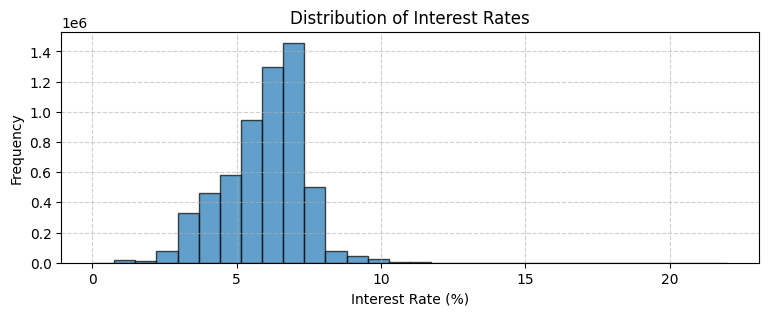

In [8]:
plt.figure(figsize=(9, 3))
plt.hist(df['interest_rate'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

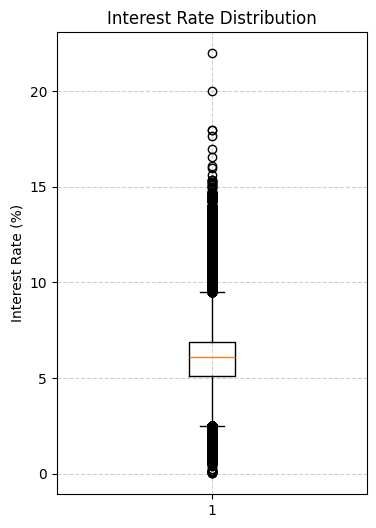

In [9]:
plt.figure(figsize=(4,6))
plt.boxplot(df['interest_rate'])
plt.title('Interest Rate Distribution')
plt.ylabel('Interest Rate (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [10]:
df.head()

,derived_ethnicity,derived_race,loan_amount,loan_to_value_ratio,interest_rate,property_value,income,debt_to_income_ratio,applicant_ethnicity-1,applicant_race-1,applicant_sex,applicant_age
0,Not Hispanic or Latino,White,655000.0,76.471,5.000,865000.0,228.0,30%-<36%,2.0,5.0,Female,25-34
1,Not Hispanic or Latino,White,785000.0,90.000,5.375,875000.0,158.0,42,2.0,5.0,Male,35-44
2,Not Hispanic or Latino,White,515000.0,80.000,3.375,645000.0,105.0,NaN,2.0,5.0,Female,25-34
3,Joint,White,705000.0,80.000,6.500,895000.0,194.0,41,2.0,5.0,Female,25-34
4,Not Hispanic or Latino,White,305000.0,34.884,3.750,865000.0,230.0,NaN,2.0,5.0,Female,25-34


In [11]:
df.columns

Index(['derived_ethnicity', 'derived_race', 'loan_amount',
       'loan_to_value_ratio', 'interest_rate', 'property_value', 'income',
       'debt_to_income_ratio', 'applicant_ethnicity-1', 'applicant_race-1',
       'applicant_sex', 'applicant_age'],
      dtype='object')

In [12]:
df = df[
    ["derived_ethnicity", "applicant_ethnicity-1", 
     "derived_race", "applicant_race-1", 
     "applicant_sex", 
     "applicant_age", 
     "income", 
     "loan_to_value_ratio", "debt_to_income_ratio", 
     "loan_amount", "property_value",
     "interest_rate"
    ]
]

In [13]:
df.head()

,derived_ethnicity,applicant_ethnicity-1,derived_race,applicant_race-1,applicant_sex,applicant_age,income,loan_to_value_ratio,debt_to_income_ratio,loan_amount,property_value,interest_rate
0,Not Hispanic or Latino,2.0,White,5.0,Female,25-34,228.0,76.471,30%-<36%,655000.0,865000.0,5.000
1,Not Hispanic or Latino,2.0,White,5.0,Male,35-44,158.0,90.000,42,785000.0,875000.0,5.375
2,Not Hispanic or Latino,2.0,White,5.0,Female,25-34,105.0,80.000,NaN,515000.0,645000.0,3.375
3,Joint,2.0,White,5.0,Female,25-34,194.0,80.000,41,705000.0,895000.0,6.500
4,Not Hispanic or Latino,2.0,White,5.0,Female,25-34,230.0,34.884,NaN,305000.0,865000.0,3.750


<hr>
<hr>

# ETHNICITY & RACE

<hr>

## Ethnicity:

In [14]:
print(df['derived_ethnicity'].value_counts())


derived_ethnicity
Not Hispanic or Latino     4519955
Hispanic or Latino          664098
Ethnicity Not Available     458377
Joint                       181433
Free Form Text Only           1791
Name: count, dtype: int64


In [15]:
df.groupby(by=['derived_ethnicity','applicant_ethnicity-1']).count()['interest_rate']

derived_ethnicity        applicant_ethnicity-1
Ethnicity Not Available  3.0                       458201
                         4.0                          176
Hispanic or Latino       1.0                       623632
                         11.0                       14308
                         12.0                        4088
                         13.0                        2246
                         14.0                       19824
Joint                    1.0                        73158
                         2.0                       101023
                         11.0                        1817
                         12.0                         845
                         13.0                         420
                         14.0                        4170
Not Hispanic or Latino   2.0                      4519955
Name: interest_rate, dtype: int64

<hr>

## Race:

In [16]:
print(df['derived_race'].value_counts())
print("\n")
print(df['applicant_race-1'].value_counts())

derived_race
White                                        4101827
Asian                                         652632
Race Not Available                            534520
Black or African American                     315668
Joint                                         172715
American Indian or Alaska Native               27902
2 or more minority races                       10968
Native Hawaiian or Other Pacific Islander       8621
Free Form Text Only                              801
Name: count, dtype: int64


applicant_race-1
5.0     4196706
2.0      602378
6.0      534347
3.0      339310
21.0      57278
1.0       44956
22.0      12079
27.0      11715
4.0        8619
23.0       5841
26.0       4381
25.0       3752
44.0       1664
24.0       1167
41.0        196
42.0        179
7.0         173
43.0        112
Name: count, dtype: int64


Values:
- 1 - American Indian or Alaska Native
- 2 - Asian
- 21 - Asian Indian
- 22 - Chinese
- 23 - Filipino
- 24 - Japanese
- 25 - Korean
- 26 - Vietnamese
- 27 - Other Asian
- 3 - Black or African American
- 4 - Native Hawaiian or Other Pacific Islander
- 41 - Native Hawaiian
- 42 - Guamanian or Chamorro
- 43 - Samoan
- 44 - Other Pacific Islander
- 5 - White
- 6 - Information not provided by applicant in mail, internet, or telephone application
- 7 - Not applicable

In [17]:
df["applicant_race-1"] = df["applicant_race-1"].replace({
    1: "American Indian or Alaska Native", 
    2: "Asian", 
    21: "Asian", 
    22: "Asian", 
    23: "Asian", 
    24: "Asian", 
    25: "Asian", 
    26: "Asian", 
    27: "Asian", 
    3: "Black or African American", 
    4: "Native Hawaiian or Other Pacific Islander", 
    41: "Native Hawaiian or Other Pacific Islander", 
    42: "Native Hawaiian or Other Pacific Islander", 
    43: "Native Hawaiian or Other Pacific Islander", 
    44: "Native Hawaiian or Other Pacific Islander", 
    5: "White", 
    6: "n/a", 
    7: "n/a"
})

In [18]:
df["applicant_ethnicity-1"] = df["applicant_ethnicity-1"].replace({
    1: "Hispanic or Latino", 
    11: "Hispanic or Latino", 
    12: "Hispanic or Latino", 
    13: "Hispanic or Latino", 
    14: "Hispanic or Latino", 
    2: "Not Hispanic or Latino", 
    3: "n/a", 
    4: "n/a"
})

<hr>
<hr>

# FEATURE ENGINEERING

In [19]:
df.insert(0, 'ethnicity_race', None)

In [20]:
df.head()

,ethnicity_race,derived_ethnicity,applicant_ethnicity-1,derived_race,applicant_race-1,applicant_sex,applicant_age,income,loan_to_value_ratio,debt_to_income_ratio,loan_amount,property_value,interest_rate
0,None,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Female,25-34,228.0,76.471,30%-<36%,655000.0,865000.0,5.000
1,None,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Male,35-44,158.0,90.000,42,785000.0,875000.0,5.375
2,None,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Female,25-34,105.0,80.000,NaN,515000.0,645000.0,3.375
3,None,Joint,Not Hispanic or Latino,White,White,Female,25-34,194.0,80.000,41,705000.0,895000.0,6.500
4,None,Not Hispanic or Latino,Not Hispanic or Latino,White,White,Female,25-34,230.0,34.884,NaN,305000.0,865000.0,3.750


In [21]:
for i in range(len(df)):
    if df.loc[i, "derived_ethnicity"] == 'Hispanic or Latino':
        df.loc[i, "ethnicity_race"] = 'Hispanic or Latino'
    elif df.loc[i, 'derived_race'] in ['White', 'Asian', 'Black or African American', 'American Indian or Alaska Native', 'Native Hawaiian or Other Pacific Islander']:
        df.loc[i, "ethnicity_race"] = df.loc[i, 'derived_race']
    elif df.loc[i, 'applicant_race-1'] in ['American Indian or Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian or Other Pacific Islander', 'White']:
        df.loc[i, "ethnicity_race"] = df.loc[i, 'applicant_race-1']
    else:
        df.loc[i, "ethnicity_race"] = df.loc[i, 'applicant_ethnicity-1']

In [22]:
df = df.drop(columns=['derived_ethnicity', 'applicant_ethnicity-1', 'derived_race', 'applicant_race-1'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5825654 entries, 0 to 5825653
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ethnicity_race        object 
 1   applicant_sex         object 
 2   applicant_age         object 
 3   income                float64
 4   loan_to_value_ratio   float64
 5   debt_to_income_ratio  object 
 6   loan_amount           float64
 7   property_value        float64
 8   interest_rate         float64
dtypes: float64(5), object(4)
memory usage: 400.0+ MB


In [24]:
df.head()

,ethnicity_race,applicant_sex,applicant_age,income,loan_to_value_ratio,debt_to_income_ratio,loan_amount,property_value,interest_rate
0,White,Female,25-34,228.0,76.471,30%-<36%,655000.0,865000.0,5.000
1,White,Male,35-44,158.0,90.000,42,785000.0,875000.0,5.375
2,White,Female,25-34,105.0,80.000,NaN,515000.0,645000.0,3.375
3,White,Female,25-34,194.0,80.000,41,705000.0,895000.0,6.500
4,White,Female,25-34,230.0,34.884,NaN,305000.0,865000.0,3.750


In [25]:
df['ethnicity_race'].value_counts()

ethnicity_race
White                                        3673247
Asian                                         692911
Hispanic or Latino                            674206
n/a                                           330588
Black or African American                     322658
Not Hispanic or Latino                         90793
American Indian or Alaska Native               31851
Native Hawaiian or Other Pacific Islander       9097
Name: count, dtype: int64

In [26]:
df = df[df['ethnicity_race'] != 'n/a']

In [27]:
df['debt_to_income_ratio'] = df['debt_to_income_ratio'].replace({
    '30%-<36%': '30-40', 
    '20%-<30%': '20-30', 
    '49': '40-50', 
    '<20%': '<20', 
    '42': '40-50', 
    '44': '40-50', 
    '41': '40-50', 
    '43': '40-50', 
    '40': '40-50', 
    '39': '30-40', 
    '48': '40-50', 
    '38': '30-40', 
    '45': '40-50', 
    '37': '30-40', 
    '47': '40-50', 
    '36': '30-40', 
    '46': '40-50', 
    '50%-60%': '50-60', 
    '>60%': '>60', 
    'Exempt': 'n/a', 
    '49.0': '40-50', 
    '36.0': '30-40', 
    '39.0': '30-40', 
    '45.0': '40-50',  
})

In [28]:
df['debt_to_income_ratio'].value_counts()

debt_to_income_ratio
40-50    2328376
30-40    1801553
20-30     956527
<20       285891
50-60      71578
>60        14484
n/a           24
Name: count, dtype: int64

In [29]:
df = df[df['debt_to_income_ratio'] != 'n/a']

In [30]:
df.head()

,ethnicity_race,applicant_sex,applicant_age,income,loan_to_value_ratio,debt_to_income_ratio,loan_amount,property_value,interest_rate
0,White,Female,25-34,228.0,76.471,30-40,655000.0,865000.0,5.000
1,White,Male,35-44,158.0,90.000,40-50,785000.0,875000.0,5.375
2,White,Female,25-34,105.0,80.000,NaN,515000.0,645000.0,3.375
3,White,Female,25-34,194.0,80.000,40-50,705000.0,895000.0,6.500
4,White,Female,25-34,230.0,34.884,NaN,305000.0,865000.0,3.750


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5495042 entries, 0 to 5825653
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ethnicity_race        object 
 1   applicant_sex         object 
 2   applicant_age         object 
 3   income                float64
 4   loan_to_value_ratio   float64
 5   debt_to_income_ratio  object 
 6   loan_amount           float64
 7   property_value        float64
 8   interest_rate         float64
dtypes: float64(5), object(4)
memory usage: 419.2+ MB


In [32]:
df.shape

(5495042, 9)

In [33]:
df[df['income'] >= 1e7].shape

(1, 9)

In [34]:
df = df[~(df['income'] >= 1e7)]

In [35]:
df.shape

(5495041, 9)

In [36]:
df[df['property_value'] >= 150000000].shape

(2, 9)

In [37]:
df = df[~(df['property_value'] >= 150000000)]   # 0.15 * 1e9

In [38]:
df.shape

(5495039, 9)

In [39]:
df.isna().sum()

ethnicity_race            303
applicant_sex               0
applicant_age               0
income                  58047
loan_to_value_ratio     49827
debt_to_income_ratio    36633
loan_amount                 0
property_value          59134
interest_rate               0
dtype: int64

In [40]:
df = df.dropna(subset=["ethnicity_race", "income", "loan_to_value_ratio", "debt_to_income_ratio", "property_value"])

In [41]:
df.isna().sum()

ethnicity_race          0
applicant_sex           0
applicant_age           0
income                  0
loan_to_value_ratio     0
debt_to_income_ratio    0
loan_amount             0
property_value          0
interest_rate           0
dtype: int64

In [42]:
df.shape

(5350021, 9)

In [43]:
df.to_csv('../Step4/ready_dataset_fromStep3.csv', index=False)